## Diag of MV susie
This notebooks rerun one of the the alzheimer disease gene to ensure the MVSuSiE works with the gene  
ENSG00000196126
ENSG00000203710


In [ ]:
nohup sos run ~/GIT/neuro-twas/workflow/mv_susie.ipynb mv_susie_cv \
--molecular_pheno_dir "/mnt/mfs/statgen/neuro-twas/mv_wg/molecular_phenotype_list" \
--region_list /mnt/mfs/statgen/neuro-twas/mv_s_diag/wg_rds_list_final \
--wd "/mnt/mfs/statgen/neuro-twas/mv_s_diag/" \
--name_prefix "geneTpmResidualsAgeGenderAdj_rename" \
--container /mnt/mfs/statgen/containers/twas_latest.sif \
--impute TRUE --job_size 1 \
--cv_times 100 \
--extract_snp "~/Project/Alz/data/AD_sumstats_SNP" \
--mixture_prior '/home/hs3163/Project/Genome_prior/mixture_prior/output/susie.teem.rds' \
-J 200 -q csg -c ~/GIT/neuro-twas/code/csg.yml -s build &

In [1]:
library(dplyr)
library(tibble)
library(readr)
library(ggplot2)
library(purrr)
library(tidyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
a = attach("/mnt/mfs/statgen/neuro-twas/mv_s_diag/result/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.mv_susie.model.cv.RData")

The following object is masked from file:/mnt/mfs/statgen/neuro-twas/mv_s_diag/result/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.mv_susie.model.cv.RData (pos = 3):

    full_model




In [13]:
names(a$full_model$pval) = c("AC","PCC","DLPFC")
names(b$full_model$pval) = c("AC","PCC","DLPFC")

In [10]:
b = attach("/mnt/mfs/statgen/neuro-twas/mv_s_diag/result/geneTpmResidualsAgeGenderAdj_rename.ENSG00000196126.mv_susie.model.cv.RData")

The following object is masked from file:/mnt/mfs/statgen/neuro-twas/mv_wg/result/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.mv_susie.model.cv.RData:

    full_model


The following object is masked from file:/mnt/mfs/statgen/neuro-twas/mv_s_diag/result/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.mv_susie.model.cv.RData (pos = 4):

    full_model


The following object is masked from file:/mnt/mfs/statgen/neuro-twas/mv_s_diag/result/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.mv_susie.model.cv.RData (pos = 5):

    full_model




In [4]:
mb_a = attach("/mnt/mfs/statgen/neuro-twas/mv_wg/result/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.mv_susie.model.cv.RData")

The following object is masked from file:/mnt/mfs/statgen/neuro-twas/mv_s_diag/result/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.mv_susie.model.cv.RData (pos = 3):

    full_model


The following object is masked from file:/mnt/mfs/statgen/neuro-twas/mv_s_diag/result/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.mv_susie.model.cv.RData (pos = 4):

    full_model




In [11]:
mb_b = attach("/mnt/mfs/statgen/neuro-twas/mv_wg/result/geneTpmResidualsAgeGenderAdj_rename.ENSG00000196126.mv_susie.model.cv.RData")

The following object is masked from file:/mnt/mfs/statgen/neuro-twas/mv_s_diag/result/geneTpmResidualsAgeGenderAdj_rename.ENSG00000196126.mv_susie.model.cv.RData:

    full_model


The following object is masked from file:/mnt/mfs/statgen/neuro-twas/mv_wg/result/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.mv_susie.model.cv.RData:

    full_model


The following object is masked from file:/mnt/mfs/statgen/neuro-twas/mv_s_diag/result/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.mv_susie.model.cv.RData (pos = 5):

    full_model


The following object is masked from file:/mnt/mfs/statgen/neuro-twas/mv_s_diag/result/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.mv_susie.model.cv.RData (pos = 6):

    full_model




In [14]:
names(mb_a$full_model$pval) = c("AC","PCC","DLPFC")
names(mb_b$full_model$pval) = c("AC","PCC","DLPFC")

In [12]:
mb_a$full_model$pval

V1           V2           V3 
1.519558e-01 5.778407e-02 3.231536e-05

In [13]:
mb_a$full_model$snps%>%length
a$full_model$snps%>%length

mb_b$full_model$snps%>%length
b$full_model$snps%>%length

[1] 1371

[1] 1092

[1] 8346

[1] 8272

In [25]:
ENSG00000203710 = cbind(mmbr_pv = mb_a$full_model$pval,mvs_pv = a$full_model$pval)
ENSG00000196126 = cbind(mmbr_pv = mb_b$full_model$pval,mvs_pv = b$full_model$pval)

In [26]:
ENSG00000203710
ENSG00000196126

,mmbr_pv,mvs_pv
AC,1.519558e-01,0.29752638
PCC,5.778407e-02,0.25016801
DLPFC,3.231536e-05,0.04151472


,mmbr_pv,mvs_pv
AC,1.419125e-18,4.087482e-13
PCC,1.913424e-16,6.452358e-12
DLPFC,3.083466e-22,1.699365e-15


In [9]:
gene_name = "~/Project/Alz/data/Alz_gene_list.txt"
gene = read_delim(gene_name, delim = "\t" ) 


── Column specification ────────────────────────────────────────────────────────
cols(
  gene = col_character(),
  ensembl_id = col_character(),
  chr = col_double()
)




In [11]:
dir = "/mnt/mfs/statgen/neuro-twas/mv_wg/wgt/"
Proj = c("DLPFC","AC","PCC")
tmp = tibble(
  Proj_Name = Proj
)
analysis = tmp%>%mutate(
  result_data = map(Proj_Name,~read_delim(paste(dir,.x,"/result/all_result.txt",sep = ""),delim = "\t")%>%filter(FILE!="FILE")),
  result_data_TWAS = map(result_data,~.x%>%filter(!TWAS.P %in% "     NA")%>%select(-FILE)%>%mutate(
      MODELCV.R2 = as.numeric(MODELCV.R2),
      MODELCV.PV = p.adjust(as.numeric(MODELCV.PV), method = "fdr") ,
      TWAS.P = as.numeric(TWAS.P),
      TWAS.P.Adj = p.adjust(TWAS.P, method = "fdr"))%>%filter()),
        twas_gene = map(result_data_TWAS,~.x$ID),
        psed_gene = map(result_data_TWAS,~.x%>%filter(TWAS.P.Adj<0.05)),
        r2 = map(result_data_TWAS,~.x%>%pull(MODELCV.R2)%>%as.numeric%>%na.omit()%>%mean()),
        pval = map(result_data_TWAS,~.x%>%pull(MODELCV.PV)%>%as.numeric%>%na.omit()%>%mean())
)
exp = analysis%>%unnest(result_data_TWAS)%>%filter(ID %in% gene$ensembl_id )%>%select(-psed_gene,-result_data,-twas_gene)%>%filter(ID %in% c("ENSG00000196126","ENSG00000203710") )


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_character()
)
ℹ Use `spec()` for the full column specifications.



── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_character()
)
ℹ Use `spec()` for the full column specifications.



── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_character()
)
ℹ Use `spec()` for the full column specifications.




In [17]:
exp%>%select(Proj_Name,ID,CHR,MODELCV.PV)%>%mutate(New.PV = c(a$full_model$pval[3],b$full_model$pval[3],a$full_model$pval[1],b$full_model$pval[1],a$full_model$pval[2],b$full_model$pval[2]))

Proj_Name,ID,CHR,MODELCV.PV,New.PV
<chr>,<chr>,<chr>,<dbl>,<dbl>
DLPFC,ENSG00000203710,1,9.920000e-04,4.151472e-02
DLPFC,ENSG00000196126,6,2.883000e-20,1.699365e-15
AC,ENSG00000203710,1,5.166667e-01,2.975264e-01
AC,ENSG00000196126,6,1.302000e-16,4.087482e-13
PCC,ENSG00000203710,1,4.727500e-01,2.501680e-01
PCC,ENSG00000196126,6,1.767000e-14,6.452358e-12


In [15]:
dir = "/mnt/mfs/statgen/neuro-twas/whole_genome_0504/wgt/"
Proj = c("DLPFC","AC","PCC")
tmp = tibble(
  Proj_Name = Proj
)
analysis = tmp%>%mutate(
  result_data = map(Proj_Name,~read_delim(paste(dir,.x,"/result/all_result.txt",sep = ""),delim = "\t")%>%filter(FILE!="FILE")),
  result_data_TWAS = map(result_data,~.x%>%filter(!TWAS.P %in% "     NA")%>%select(-FILE)%>%mutate(
      MODELCV.R2 = as.numeric(MODELCV.R2),
      MODELCV.PV = p.adjust(as.numeric(MODELCV.PV), method = "fdr") ,
      TWAS.P = as.numeric(TWAS.P),
      TWAS.P.Adj = p.adjust(TWAS.P, method = "fdr"))%>%filter()),
        twas_gene = map(result_data_TWAS,~.x$ID),
        psed_gene = map(result_data_TWAS,~.x%>%filter(TWAS.P.Adj<0.05)),
        r2 = map(result_data_TWAS,~.x%>%pull(MODELCV.R2)%>%as.numeric%>%na.omit()%>%mean()),
        pval = map(result_data_TWAS,~.x%>%pull(MODELCV.PV)%>%as.numeric%>%na.omit()%>%mean())
)
exp = analysis%>%unnest(result_data_TWAS)%>%filter(ID %in% gene$ensembl_id )%>%select(-psed_gene,-result_data,-twas_gene)%>%filter(ID %in% c("ENSG00000196126","ENSG00000203710") )

V3           V3           V1           V1           V2           V2 
4.151472e-02 1.699365e-15 2.975264e-01 4.087482e-13 2.501680e-01 6.452358e-12

## Rerun pilot with new MV_SUSIE packages

In [ ]:
nohup sos run ~/GIT/neuro-twas/workflow/mv_susie.ipynb mv_susie_cv \
--molecular_pheno_dir "/mnt/mfs/statgen/neuro-twas/mv_wg/molecular_phenotype_list" \
--region_list  /home/hs3163/Project/Alz/multi_susie_pilot/cand_rgs_ftr.txt \
--wd "/mnt/mfs/statgen/neuro-twas/mv_s_diag/" \
--name_prefix "geneTpmResidualsAgeGenderAdj_rename" \
--container /mnt/mfs/statgen/containers/twas_latest.sif \
--impute TRUE --job_size 1 \
--cv_times 100 \
--extract_snp "~/Project/Alz/data/AD_sumstats_SNP" \
--mixture_prior '/home/hs3163/Project/Genome_prior/mixture_prior/output/susie.teem.rds' \
-J 200 -q csg -c ~/GIT/neuro-twas/code/csg.yml -s build &

## Loading of the original pilot

In [14]:
total_ori = attach("~/Project/Alz/multi_susie_pilot/mv_cv.RData")$output 
susie_data_ori = total_ori%>%select(-path)%>%mutate( 
  n_of_cs = map_dbl(model,~.x$sets$cs_index%>%length()),
  rmse_ac = map_dbl(model,~.x$rmse[1]),
  rmse_PCC = map_dbl(model,~.x$rmse[2]),
  rmse_DLPFC = map_dbl(model,~.x$rmse[3]),
  r2_ac = map_dbl(model,~.x$r2[1]%>%round(3)),
  r2_PCC = map_dbl(model,~.x$r2[2]%>%round(3)),
  r2_DLPFC = map_dbl(model,~.x$r2[3]%>%round(3)),
 pval_ac = map_dbl(model,~.x$pval[1]),
 pval_PCC = map_dbl(model,~.x$pval[2]),
 pval_DLPFC = map_dbl(model,~.x$pval[3])
)

In [15]:
susie_data_ori = susie_data_ori%>%mutate(n = map_dbl(model,~.x$snps%>%length))

In [17]:
susie_data_ori%>%select(ID,n)

ID,n
<chr>,<dbl>
ENSG00000002587,2006
ENSG00000007047,1951
ENSG00000007255,1639
ENSG00000022277,1903
ENSG00000029725,2016
ENSG00000064666,2195
ENSG00000064687,2195
ENSG00000065268,2233
ENSG00000066923,977


In [67]:
susie_data_ori_pva_vis = susie_data_ori%>%select(ID,r2_ac,r2_PCC,r2_DLPFC)%>%pivot_longer(names_to = "tissue", names_prefix = "r2_",values_to = "r2",cols = r2_ac:r2_DLPFC)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 6 rows containing non-finite values (stat_bin).”


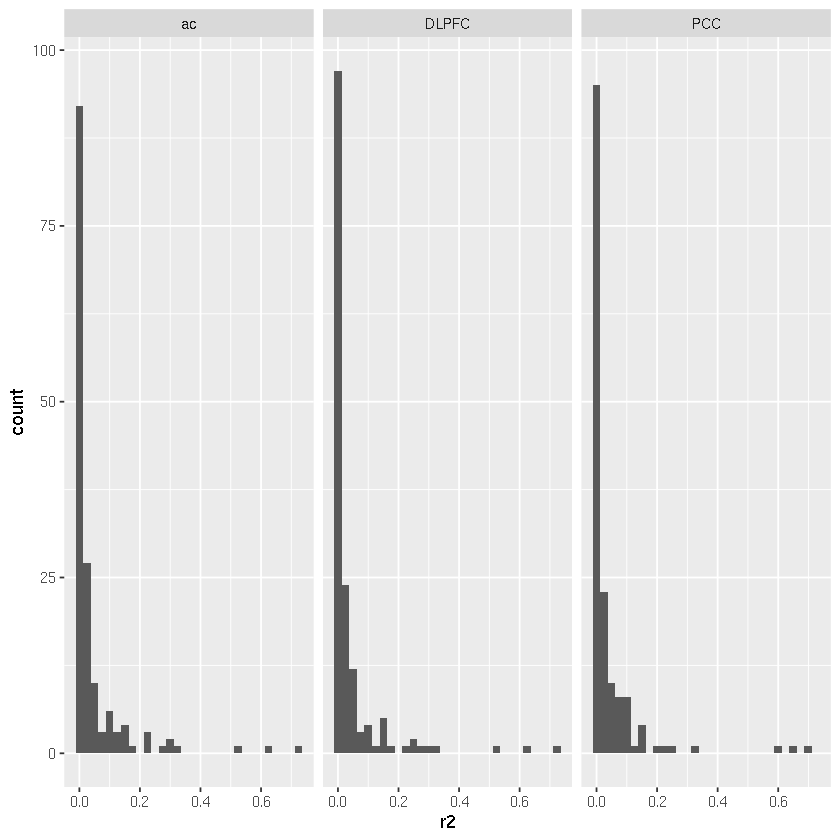

In [68]:
susie_data_ori_pva_vis%>%ggplot(aes(x = r2))+geom_histogram()+facet_grid(~tissue)

## Loading of the new pilot

In [18]:
total_new = attach("/mnt/mfs/statgen/neuro-twas/mv_s_diag/mv_cv.RData")$output 
susie_data = total_new%>%select(-path)%>%mutate( 
  n_of_cs = map_dbl(model,~.x$sets$cs_index%>%length()),
  rmse_ac = map_dbl(model,~.x$rmse[1]),
  rmse_PCC = map_dbl(model,~.x$rmse[2]),
  rmse_DLPFC = map_dbl(model,~.x$rmse[3]),
  r2_ac = map_dbl(model,~.x$r2[1]%>%round(3)),
  r2_PCC = map_dbl(model,~.x$r2[2]%>%round(3)),
  r2_DLPFC = map_dbl(model,~.x$r2[3]%>%round(3)),
 pval_ac = map_dbl(model,~.x$pval[1]),
 pval_PCC = map_dbl(model,~.x$pval[2]),
 pval_DLPFC = map_dbl(model,~.x$pval[3]),
 n = map_dbl(model,~.x$snps%>%length)
)

The following object is masked from file:~/Project/Alz/multi_susie_pilot/mv_cv.RData:

    output




In [64]:
susie_data_pva_vis = susie_data%>%select(ID,r2_ac,r2_PCC,r2_DLPFC)%>%pivot_longer(names_to = "tissue", names_prefix = "r2_",values_to = "r2",cols = r2_ac:r2_DLPFC)

In [20]:
inner_join(susie_data_ori%>%select(ID,n),susie_data%>%select(ID,n1 = n))

Joining, by = "ID"



ID,n,n1
<chr>,<dbl>,<dbl>
ENSG00000002587,2006,1913
ENSG00000007047,1951,1594
ENSG00000007255,1639,1623
ENSG00000022277,1903,1835
ENSG00000029725,2016,1825
ENSG00000064666,2195,2159
ENSG00000064687,2195,2161
ENSG00000065268,2233,2201
ENSG00000066923,977,890


In [63]:
susie_data%>%colnames

[1] "ID"         "env"        "tb_name"    "model"      "n_of_cs"   
 [6] "rmse_ac"    "rmse_PCC"   "rmse_DLPFC" "r2_ac"      "r2_PCC"    
[11] "r2_DLPFC"   "pval_ac"    "pval_PCC"   "pval_DLPFC"

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



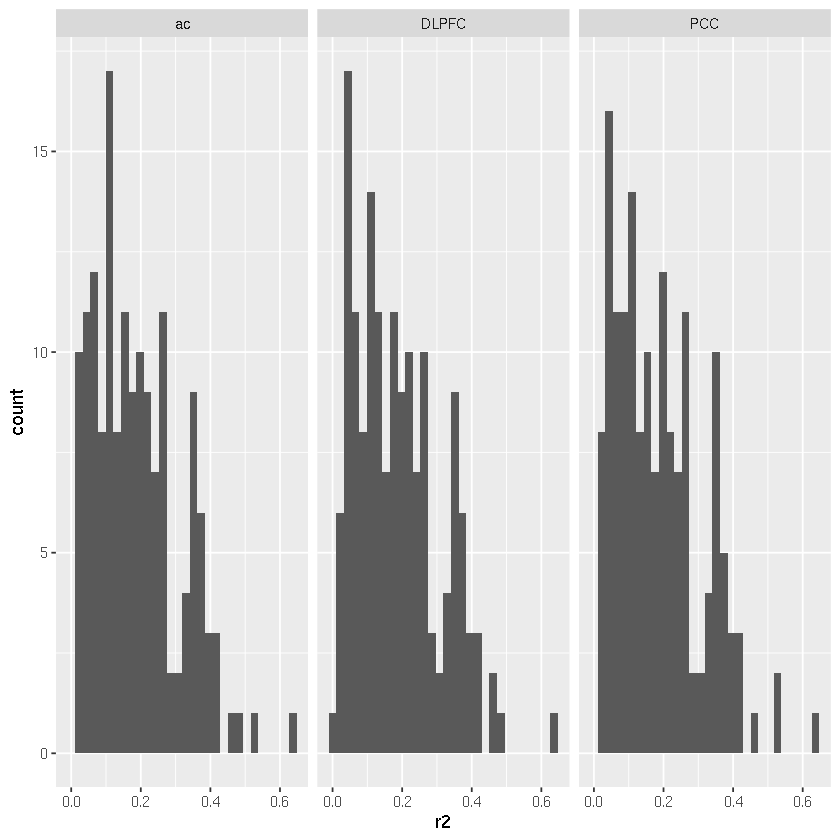

In [69]:
susie_data_pva_vis%>%ggplot(aes(x = r2))+geom_histogram()+facet_grid(~tissue)

In [ ]:
## Relationships between the two datasets

In [70]:
pval_comp = inner_join(susie_data_pva_vis,susie_data_ori_pva_vis,by = c("ID","tissue") )%>%select(ID,tissue,mvsusieR_pv = r2.x, mmbr_pv = r2.y)

In [71]:
pval_comp%>%na.omit

ID,tissue,mvsusieR_pv,mmbr_pv
<chr>,<chr>,<dbl>,<dbl>
ENSG00000002587,ac,0.303,0.002
ENSG00000002587,PCC,0.301,-0.003
ENSG00000002587,DLPFC,0.303,-0.002
ENSG00000007047,ac,0.363,0.044
ENSG00000007047,PCC,0.362,0.095
ENSG00000007047,DLPFC,0.364,0.096
ENSG00000007255,ac,0.240,0.004
ENSG00000007255,PCC,0.239,-0.003
ENSG00000007255,DLPFC,0.238,-0.003


In [72]:
lm(data = pval_comp%>%filter(tissue == "ac"),mvsusieR_pv ~ mmbr_pv)%>%summary


Call:
lm(formula = mvsusieR_pv ~ mmbr_pv, data = pval_comp %>% filter(tissue == 
    "ac"))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.16998 -0.10248 -0.01494  0.07949  0.34769 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.18069    0.01061  17.037   <2e-16 ***
mmbr_pv      0.14933    0.09425   1.584    0.115    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1216 on 154 degrees of freedom
Multiple R-squared:  0.01604,	Adjusted R-squared:  0.009648 
F-statistic:  2.51 on 1 and 154 DF,  p-value: 0.1152


In [73]:
lm(data = pval_comp%>%filter(tissue == "DLPFC"),mvsusieR_pv ~ mmbr_pv)%>%summary


Call:
lm(formula = mvsusieR_pv ~ mmbr_pv, data = pval_comp %>% filter(tissue == 
    "DLPFC"))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.17194 -0.10554 -0.01255  0.08185  0.35470 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.17926    0.01060  16.905   <2e-16 ***
mmbr_pv      0.15787    0.09546   1.654      0.1    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1225 on 154 degrees of freedom
Multiple R-squared:  0.01745,	Adjusted R-squared:  0.01107 
F-statistic: 2.735 on 1 and 154 DF,  p-value: 0.1002


In [74]:
lm(data = pval_comp%>%filter(tissue == "PCC"),mvsusieR_pv ~ mmbr_pv)%>%summary


Call:
lm(formula = mvsusieR_pv ~ mmbr_pv, data = pval_comp %>% filter(tissue == 
    "PCC"))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.17758 -0.10657 -0.01171  0.08440  0.29150 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.17657    0.01052  16.780   <2e-16 ***
mmbr_pv      0.23537    0.09885   2.381   0.0185 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1224 on 154 degrees of freedom
Multiple R-squared:  0.03551,	Adjusted R-squared:  0.02925 
F-statistic:  5.67 on 1 and 154 DF,  p-value: 0.01848


In [75]:
for(i in c("PCC","DLPFC","ac")){
    t.test(pval_comp%>%filter(tissue == i)%>%pull(mvsusieR_pv),pval_comp%>%filter(tissue == i)%>%pull(mmbr_pv),alternative = "g")%>%print    
}



	Welch Two Sample t-test

data:  pval_comp %>% filter(tissue == i) %>% pull(mvsusieR_pv) and pval_comp %>% filter(tissue == i) %>% pull(mmbr_pv)
t = 11.531, df = 295.84, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.1258946       Inf
sample estimates:
 mean of x  mean of y 
0.18569231 0.03877564 


	Welch Two Sample t-test

data:  pval_comp %>% filter(tissue == i) %>% pull(mvsusieR_pv) and pval_comp %>% filter(tissue == i) %>% pull(mmbr_pv)
t = 11.173, df = 300.65, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.1224344       Inf
sample estimates:
 mean of x  mean of y 
0.18593590 0.04228846 


	Welch Two Sample t-test

data:  pval_comp %>% filter(tissue == i) %>% pull(mvsusieR_pv) and pval_comp %>% filter(tissue == i) %>% pull(mmbr_pv)
t = 11.126, df = 301.95, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater tha

In [15]:
susie_data_ori%>%select(pval_ac,pval_PCC,pval_DLPFC)

pval_ac,pval_PCC,pval_DLPFC
<dbl>,<dbl>,<dbl>
4.425608e-01,5.678533e-01,5.510751e-01
6.211649e-02,1.286271e-02,2.899548e-03
3.733568e-01,5.536063e-01,5.806568e-01
5.464645e-01,5.750159e-01,4.506037e-01
3.435592e-01,2.483677e-01,3.818580e-02
1.038169e-02,5.333433e-03,1.682692e-03
1.144427e-01,3.836240e-01,2.000749e-01
1.025171e-06,7.510045e-05,9.025211e-03
4.741720e-01,3.154219e-01,5.371908e-01
